In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [8]:
# loading dataset
(X_train, Y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

In [9]:
X_train.shape

(60000, 28, 28)

- Training : 60000 images, (28 x 28)px
- Test : 10000 images, (28 x 28)px

3


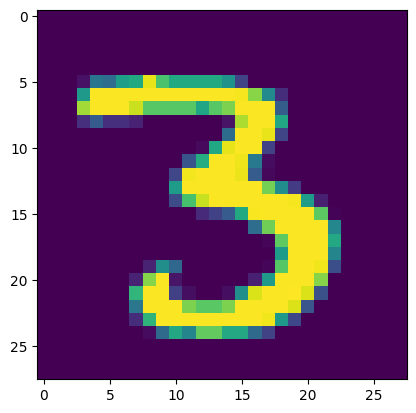

In [13]:
plt.imshow(X_train[12])
print(Y_train[12])

In [14]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [15]:
# Scaling the values
X_train = X_train / 255
x_test = x_test / 255

In [16]:
# BUilding Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8763 - loss: 0.4262
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9645 - loss: 0.1157
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9760 - loss: 0.0771
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0548
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0408
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9897 - loss: 0.0326
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9909 - loss: 0.0272
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9924 - loss: 0.0224
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9940 - loss: 0.0190
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9944 - loss: 0.0169


Training acc: 99.44%

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.1220
Test loss: 0.10372081398963928
Test accuracy: 0.974399983882904


Test acc: 97.44%

In [20]:
print(x_test.shape)

(10000, 28, 28)


In [21]:
Y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
Y_pred[12]

array([5.6984263e-05, 4.5004999e-05, 1.2558246e-08, 4.5308140e-03,
       9.9993676e-01, 1.3486035e-03, 4.1623142e-07, 8.1092110e-03,
       2.6794871e-02, 9.9999994e-01], dtype=float32)

model.predict() gives prob of the the answer to be a particular one.
we will convert probablitites to labels

In [27]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels[12])

9


In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, Y_pred_labels)

In [31]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    1,    2,    1,    1,    0,    1,    1],
       [   1, 1119,    3,    2,    1,    0,    3,    2,    4,    0],
       [   4,    1, 1000,    7,    1,    0,    1,   10,    8,    0],
       [   1,    0,    1,  991,    0,    3,    1,    6,    4,    3],
       [   2,    0,    4,    0,  970,    0,    2,    1,    0,    3],
       [   2,    1,    0,   32,    2,  846,    1,    0,    5,    3],
       [   4,    2,    0,    2,    9,    5,  936,    0,    0,    0],
       [   1,    2,    6,    1,    3,    0,    0, 1001,    2,   12],
       [   4,    0,    4,    7,    6,    3,    3,    4,  935,    8],
       [   1,    2,    0,    6,   27,    2,    0,    3,    3,  965]],
      dtype=int32)>

Text(158.22222222222223, 0.5, 'Truth')

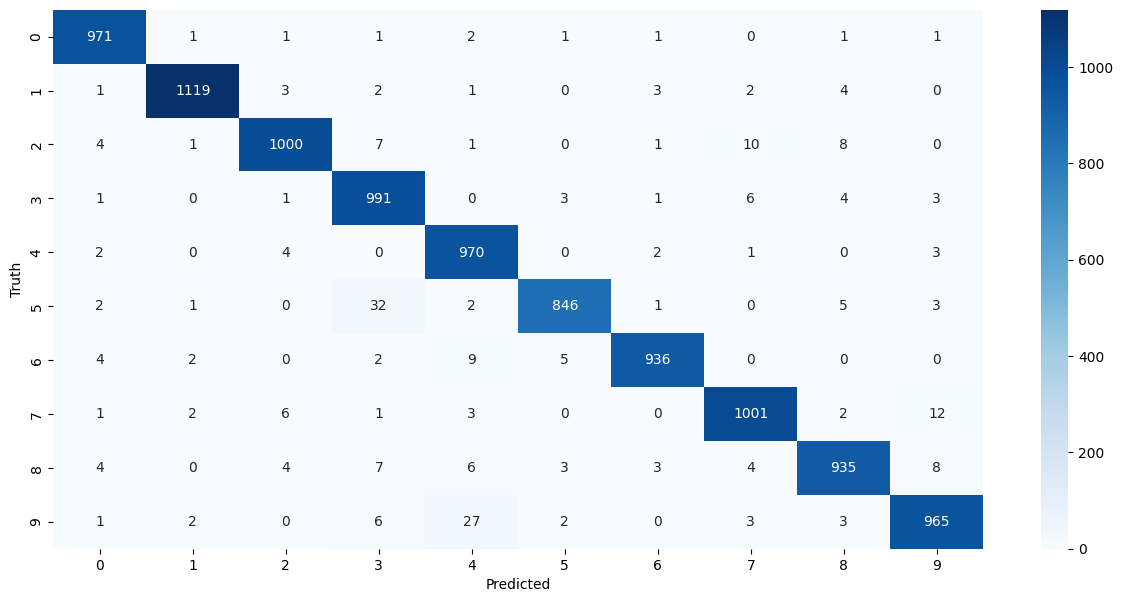

In [35]:
# creating heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
## Building a predictive system on custom image
input_image = cv2.imread('/content/MNIST_digit.png', cv2.IMREAD_GRAYSCALE)

In [39]:
type(input_image)

numpy.ndarray

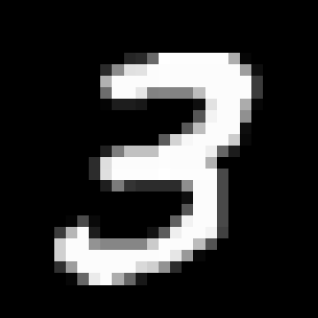

In [40]:
cv2_imshow(input_image)

In [41]:
input_image.shape

(318, 318)

In [42]:
resize_image= cv2.resize(input_image, (28, 28))

In [43]:
resize_image.shape

(28, 28)

In [45]:
resize_image=resize_image/255

In [48]:
image_reshaped = np.reshape(resize_image, [1, 28, 28])

In [49]:
inputpred= model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [50]:
inputpred

array([[1.60839536e-11, 1.45475525e-08, 4.24313384e-09, 1.00000000e+00,
        3.28746972e-20, 5.35722007e-04, 8.58418179e-23, 3.67241184e-04,
        4.74183142e-01, 9.99264836e-01]], dtype=float32)

In [51]:
inputpredlabel = np.argmax(inputpred)

In [53]:
print(inputpredlabel)

3
